In [1]:
from multistrand.objects import *
from multistrand.options import Options, Energy_Type
from multistrand.system import *

In [2]:
def print_trajectory(o):
    print(o.full_trajectory[0][0][3])   # the strand sequence
    print(o.start_state[0].structure)   # the starting structure
    for i in range(len(o.full_trajectory)):
        time = o.full_trajectory_times[i]
        state = o.full_trajectory[i][0]
        struct = state[4]
        dG = state[5]
        print(struct + ' t=%11.9f seconds, dG=%6.2f kcal/mol' % (time, dG))

In [5]:
c = Complex( strands=[Strand(name="hairpin", sequence="GTTCGGGCAAAAGCCCGAAC")], structure= 20*'.' )

In [6]:
o = Options(temperature=25, dangles='Some', start_state = [c], 
            simulation_time = 0.0000001,  # 0.1 microseconds
            num_simulations = 1,  # don't play it again, Sam
            output_interval = 1,  # record every single step
            rate_method = 'Metropolis', # the default is 'Kawasaki' (numerically, these are 1 and 2 respectively)
            simulation_mode = 'Trajectory')  # numerically 128.  See interface/_options/constants.py for more info about all this.
o.JSMetropolis25()

In [7]:
print("k_uni = %g /s, k_bi = %g /M/s" % (o.unimolecular_scaling, o.bimolecular_scaling))  # you can also set them to other values if you want

k_uni = 4.4e+08 /s, k_bi = 1.26e+06 /M/s


In [8]:
s = SimSystem(o)
s.start()

In [9]:
print_trajectory(o)

GTTCGGGCAAAAGCCCGAAC
....................
.................... t=0.000000000 seconds, dG=  0.00 kcal/mol
.......(........)... t=0.000000006 seconds, dG=  1.43 kcal/mol
.................... t=0.000000008 seconds, dG=  0.00 kcal/mol
.(..........)....... t=0.000000016 seconds, dG=  3.37 kcal/mol
((..........))...... t=0.000000017 seconds, dG=  2.40 kcal/mol
(((........)))...... t=0.000000018 seconds, dG=  3.14 kcal/mol
((..........))...... t=0.000000022 seconds, dG=  2.40 kcal/mol
(............)...... t=0.000000025 seconds, dG=  2.89 kcal/mol
(.(.......)..)...... t=0.000000027 seconds, dG=  5.27 kcal/mol
(............)...... t=0.000000029 seconds, dG=  2.89 kcal/mol
.................... t=0.000000029 seconds, dG=  0.00 kcal/mol
.......(........)... t=0.000000034 seconds, dG=  1.43 kcal/mol
.................... t=0.000000036 seconds, dG=  0.00 kcal/mol
......(.......)..... t=0.000000036 seconds, dG=  2.37 kcal/mol
.................... t=0.000000036 seconds, dG=  0.00 kcal/mol
.....(.......

In [10]:
def myplot():
    import numpy as np
    import matplotlib
    import matplotlib.pylab as plt

    times = o.full_trajectory_times
    states = o.full_trajectory
    energies = [s[0][5] for s in states]  # you can examine 'states' to see what other useful information is there

    plt.figure(1)
    plt.plot(times,energies,'go', times,energies,'g-')
    plt.title("Energy landscape for simulated hairpin folding trajectory")
    plt.xlabel("Time (seconds)",fontsize='larger')
    plt.ylabel("Microstate Energy (kcal/mol)",fontsize='larger')
    plt.yticks(fontsize='larger',va='bottom')
    plt.xticks(fontsize='larger')
    plt.show()

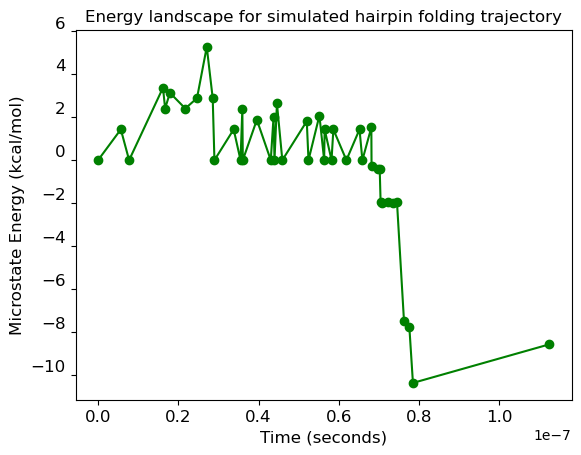

In [11]:
myplot() 